# King County Housing Price Prediciton Model

* Student name: Melody Bass
* Student pace: self paced
* Scheduled project review date/time: 1/3/2022 10:00 AM
* Instructor name: Claude Fried
* Blog post URL: https://medium.com/prediciting-house-price-in-king-county-wa


## Introduction

The focus of this project is to build a multiple linear regression model to predict sale price for houses in King County, Washington.  The model was built from a dataset of the county's home sale prices and features using an iterative approach and can be found [here](insert address).  The dataset contains information on over 21,000 houses sold during the years 2014 - 2015.  Following is a description of the features that we will include in our model:
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `zipcode` - ZIP Code used by the United States Postal Service

The first sections focus on investigating, cleaning, wrangling, and engineering some new features.  The next section contains 5 models and evaluation of each, ultimately leading to us to select our best model for predicting house prices.  Finally, I will make recommendations and provide insight on house features that have the biggest impact on sale price to a team of real estate agents that are looking to get into the business of remodeling houses.

## Business Problem

A group of real estate agents based out of Seattle are looking to expand their business into remodeling houses in addition to selling.  They want to accurately predict the value of homes based on the features of the house so they can maximize profits for their remodels.  In order to accomplish this, they have enlisted my help in building a model to predict the price of homes in the county.  They have a substantial amount of money to start investing in homes to remodel, so they are interested in obtaining information about low end and high end houses.

## Data Understanding

The dataset used for this analysis can be found on [Kaggle](insert address here).  It contains a wealth of information about home sales in King County, WA from 2014 - 2015.  Below I will import the dataset and start my investigation of relevant information it may contain.  Let's get started! 

In [389]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [390]:
# Data Import
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [391]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [392]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [393]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [394]:
sum(df.duplicated())

0

In [395]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [396]:
for col in df.columns:
    print(df[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/24/2015      1
7/27/2014      1
3/8/2015       1
5/15/2015      1
5/17/2014      1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

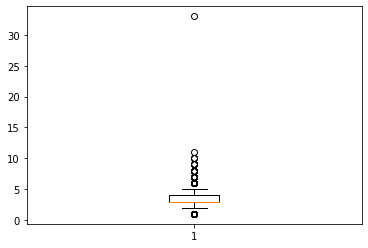

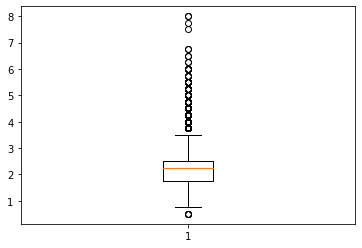

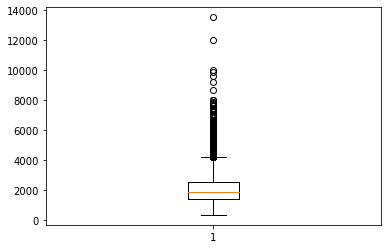

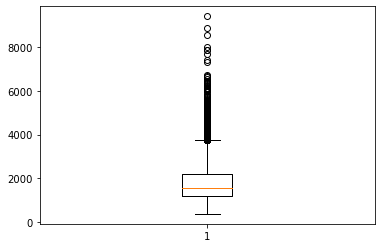

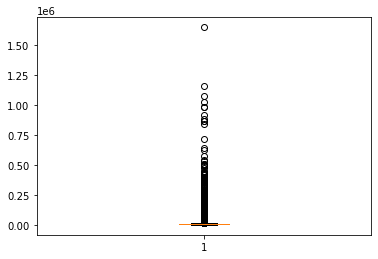

In [397]:
# Check continuous predictors for outliers using Boxplot 

outliers = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot']

for outlier in outliers:
    plt.figure()
    plt.boxplot(df[outlier]);

### Initial Observations

#### Missing Values

__yr_renovated__ has the most missing values, followed by __waterfront__ and __view__.  __waterfront__ and __view__ are categorical, so we will replace those null values with 0s.  I will assume null values in __yr_renovated__ mean that the house has not been renovated and will replace with 0s.

#### Data types

 The __date__, __waterfront__, __view__, __condition__, __grade__, __sqft_basement__ columns are stored as type object, we will need to remove or convert to numerical data type before modeling.
 
 #### Erroneous or Outlier Data
 
* I am familiar with half and full bathrooms, but what is a 0.75 bathroom?  I need to research further to determine how to handle bathrooms.
* I need to investigate the 33 bedroom home, appears to be an extreme outlier!
* __sqft_lot__ and __sqft_living__ have some heavy outliers as well, I will remove during modeling.

## Data Cleaning

In this section, I will clean the dataset by removing irrelevant columns to my analysis and trim the dataset of null values.  __sqft_basement__ is stored as an object and has several '?' entries.  We will calculate __sqft_basement__ by subtracting __sqft_above__ from __sqft_living__ and then change column to boolean __has_basement__ instead. I will also add a boolean __renovated__ column for houses that have been renovated in the last 30 years.  Categorical columns containing strings will be converted to numeric type data. Outliers from __bedrooms__ will be removed. __bathrooms__ will be binned to limit number of variables.

### Drop unused columns

In [398]:
# Columns to be dropped
dropped_columns = ['id', 'date', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'yr_built', 'lat', 'long']

In [399]:
df = df.drop(dropped_columns, axis=1)

In [400]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_renovated', 'zipcode'],
      dtype='object')

### Convert sqft_basement to boolean has_basement

In [401]:
# Calculate sqft_basement from sqft_living - sqft_above
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df['sqft_basement'].astype('int')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int64

In [402]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [403]:
# Convert to boolean
df['has_basement'] = df['sqft_basement'] > 0
df['has_basement'] = df['has_basement'].astype(int)

In [404]:
# Check to see if it worked
df['has_basement'].value_counts()

0    13110
1     8487
Name: has_basement, dtype: int64

In [405]:
# Drop old column data
df = df.drop('sqft_basement', axis=1)

### Convert yr_renovated to boolean renovated

In [406]:
# 30 years as cutoff for renovation
df['renovated'] = (df['yr_renovated'] > 1985).astype(int)

In [407]:
#Check to see if it worked
df.renovated.value_counts()

0    21016
1      581
Name: renovated, dtype: int64

In [408]:
# Drop old column
df = df.drop('yr_renovated', axis=1)

### Remove null values

In [409]:
df.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
view              63
condition          0
grade              0
sqft_above         0
zipcode            0
has_basement       0
renovated          0
dtype: int64

In [410]:
# Replace null values with 0
df = df.fillna(0)

In [411]:
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqft_above      0
zipcode         0
has_basement    0
renovated       0
dtype: int64

### Remove bedroom outlier

In [412]:
# Investigate 33 bedroom house
df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated
15856,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,98103,1,0


A 33 bedroom house that is only 1,620 square feet! It is likely a typo and I will remove.  

In [413]:
# Remove outlier
df = df.loc[(df['bedrooms'] != 33)]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,98178,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,98125,1,1
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,98028,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,98136,1,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,98074,0,0


In [414]:
# Check to see if it worked
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### Bin bathrooms

Upon researching, I found out that a 0.75 bathroom is a real thing!  It is a bathroom with toilet, sink, and either a bathtub or shower.  To cut down on some of the variable for bathrooms, I will bin into 6 categories.

In [415]:
bins = pd.IntervalIndex.from_tuples([(0.0, 1.0), (1.0, 1.75), (1.75,2.5), (2.5, 3.5), (3.5, 4.5), (4.5,8)])
bath_bins = pd.cut(df['bathrooms'],bins)
bath_bins.categories = ['<1 bath','bath_1_1.75','bath_1.75_2.5','bath_2.5_3.5','bath_3.5_4.5','bath_4.5_8']
bathroom_dummies = pd.get_dummies(bath_bins.cat.rename_categories(bath_bins.categories), drop_first=True)
bathroom_dummies

,bath_1_1.75,bath_1.75_2.5,bath_2.5_3.5,bath_3.5_4.5,bath_4.5_8
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
21592,0,1,0,0,0
21593,0,1,0,0,0
21594,0,0,0,0,0
21595,0,1,0,0,0


In [416]:
#Merge dataframe with new bathroom dummies
df = pd.concat([df, bathroom_dummies], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated,bath_1_1.75,bath_1.75_2.5,bath_2.5_3.5,bath_3.5_4.5,bath_4.5_8
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,98178,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,98125,1,1,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,98028,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,98136,1,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,98074,0,0,0,1,0,0,0


In [417]:
df = df.drop('bathrooms', axis=1)

### Convert categorical strings to integers

In [418]:
# Convert categorical strings to integers
df['waterfront'] = df['waterfront'].replace(('YES', 'NO'), (1, 0))
df['view'] = df['view'].replace(('NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT')
                                , (0, 1, 2, 3, 4))
df['condition'] = df['condition'].replace(('Poor', 'Fair', 'Average', 'Good', 'Very Good')
                                , (0, 1, 2, 3, 4))
df['grade'] = df['grade'].replace(('3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'
                                   , '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion')
                                , (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [419]:
# Check to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   sqft_living    21596 non-null  int64  
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   waterfront     21596 non-null  int64  
 6   view           21596 non-null  int64  
 7   condition      21596 non-null  int64  
 8   grade          21596 non-null  int64  
 9   sqft_above     21596 non-null  int64  
 10  zipcode        21596 non-null  int64  
 11  has_basement   21596 non-null  int64  
 12  renovated      21596 non-null  int64  
 13  bath_1_1.75    21596 non-null  uint8  
 14  bath_1.75_2.5  21596 non-null  uint8  
 15  bath_2.5_3.5   21596 non-null  uint8  
 16  bath_3.5_4.5   21596 non-null  uint8  
 17  bath_4.5_8     21596 non-null  uint8  
dtypes: flo

In [420]:
df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [421]:
df.waterfront.value_counts()

0    21450
1      146
Name: waterfront, dtype: int64

In [422]:
df.view.value_counts()

0    19484
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [423]:
df.condition.value_counts()

2    14020
3     5677
4     1700
1      170
0       29
Name: condition, dtype: int64

## Modified Features Exploration

### Distribution of Data

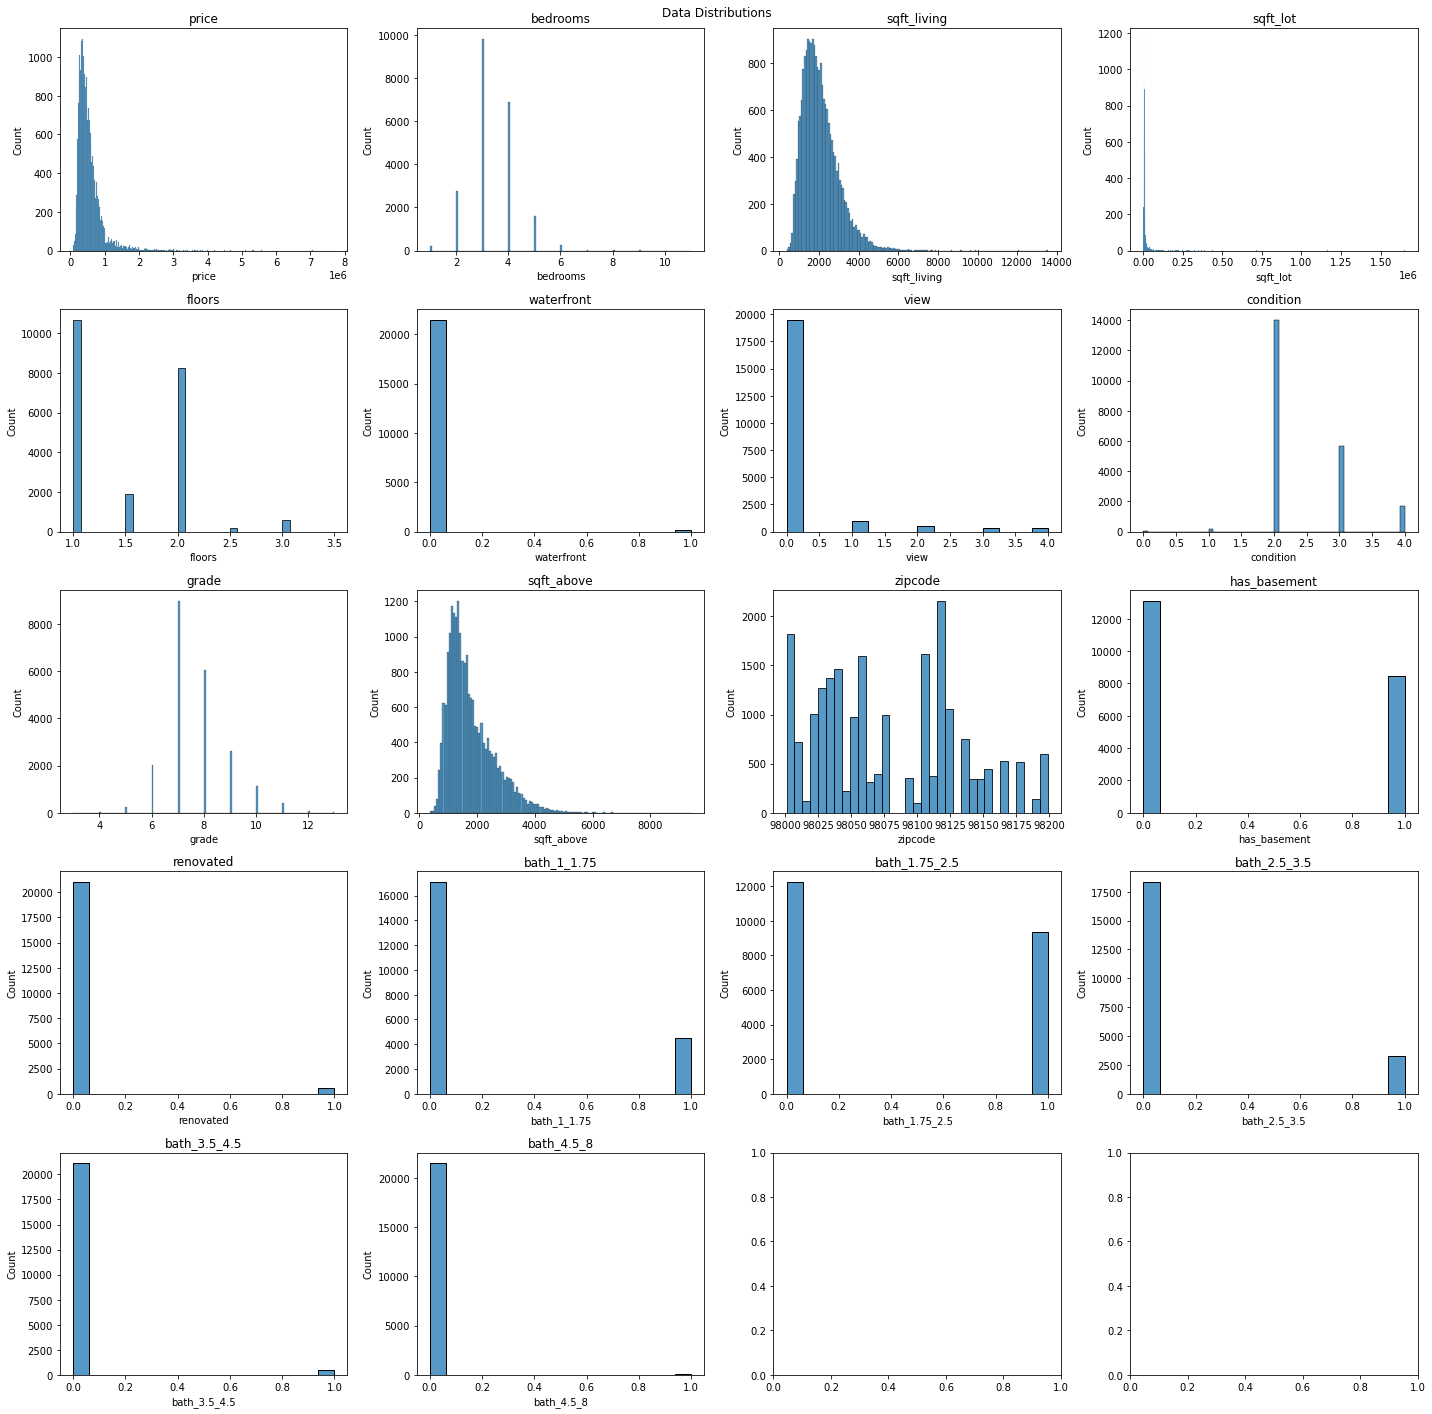

In [424]:
# Distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=5)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

### Categorical column boxplots

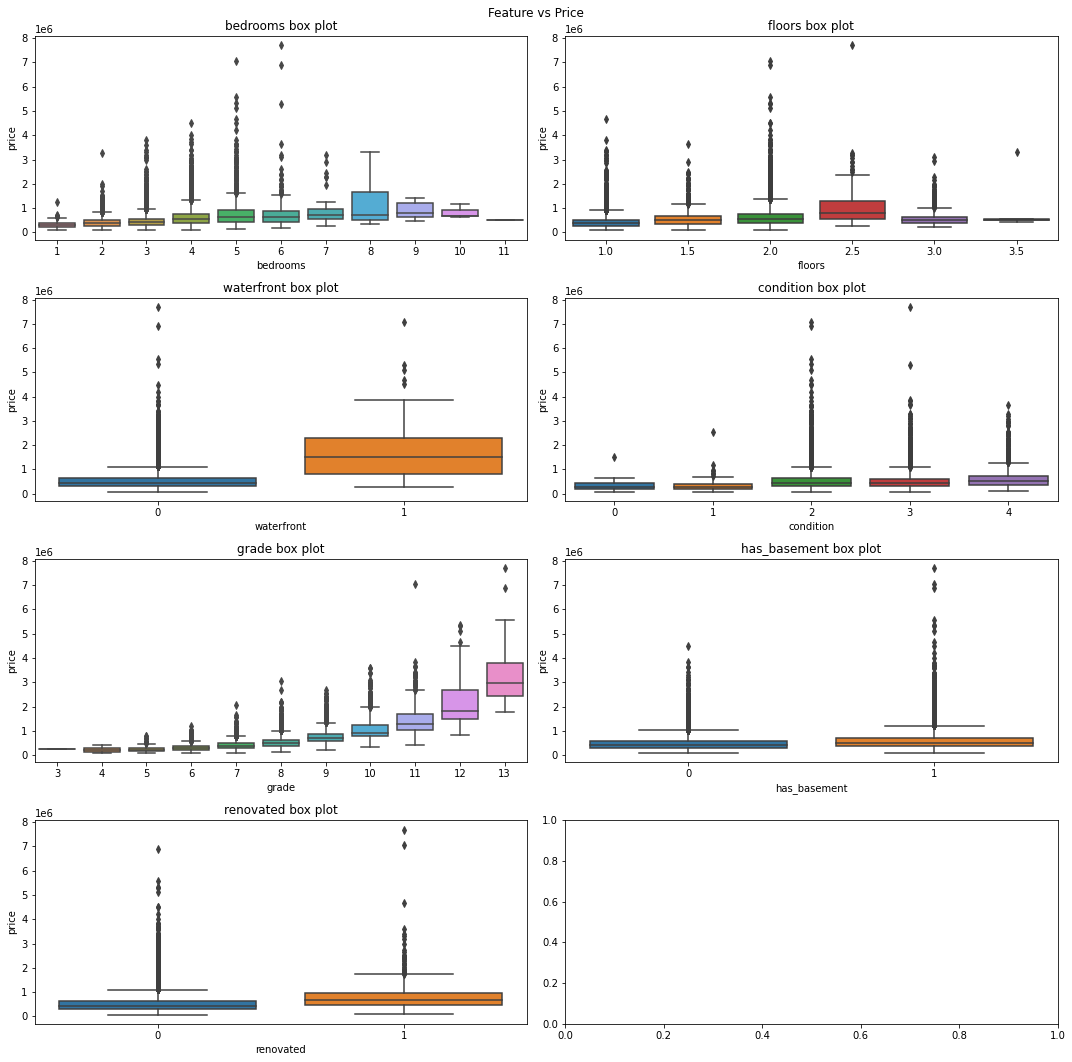

In [425]:
# Boxplots of categorical columns
cat_columns = ['bedrooms','floors','waterfront','condition','grade','has_basement','renovated']
fig, axes = plt.subplots(figsize=(15,15),ncols=2,nrows=4)
for i in range(len(cat_columns)):
    col = cat_columns[i]
    y = i%2
    x = i//2
    ax = axes[x,y]
    
    sns.boxplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col + ' box plot')
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

In [426]:
# convert to category type
categorical = ['bedrooms','floors','waterfront','view','condition','grade', 'zipcode', 'renovated','has_basement']
cont = ['sqft_living', 'sqft_lot', 'sqft_above']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')   

### Create Dummy Variables

In [427]:
df = pd.get_dummies(df, drop_first=True)

subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

df.head()

,price,sqft_living,sqft_lot,sqft_above,bath_1_175,bath_175_25,bath_25_35,bath_35_45,bath_45_8,bedrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,221900.0,1180,5650,1180,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,2170,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,770,10000,770,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,1680,8080,1680,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [428]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'bath_1_175',
 'bath_175_25',
 'bath_25_35',
 'bath_35_45',
 'bath_45_8',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'floors_15',
 'floors_20',
 'floors_25',
 'floors_30',
 'floors_35',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zi

### Pre-Modeling Linearity Check

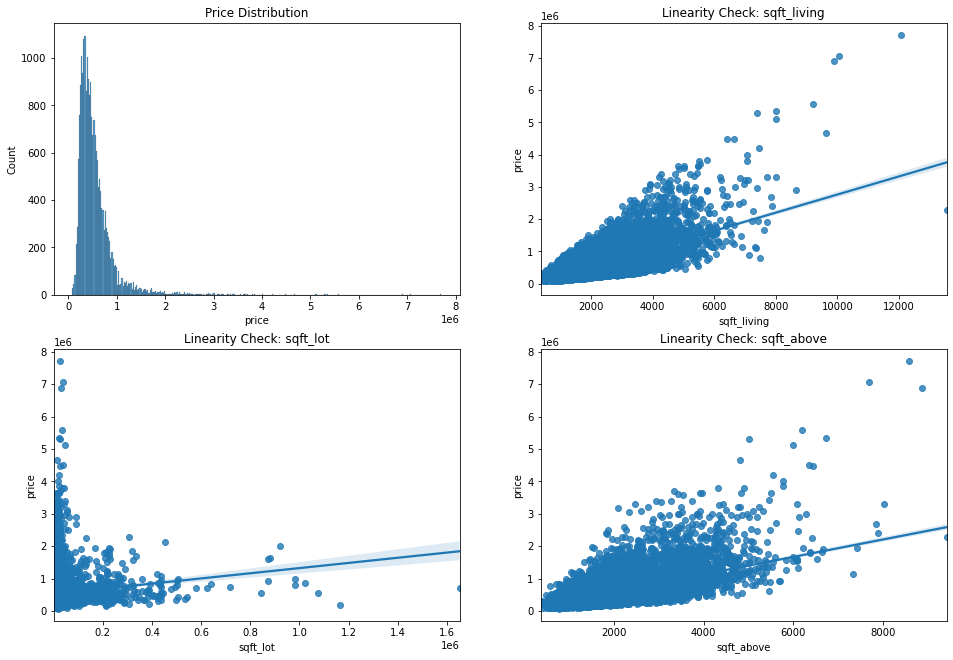

In [429]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(df['price'], ax=axes[0][0]).set_title('Price Distribution')

# Regplot
for feat, ax in zip(cont, axes.flatten()[1:]): 
  sns.regplot(feat,'price', data=df, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

#### Interpretation
* Price has outliers on the high end - possibly remove outliers in an iteration.
* __sqft_living__ and __sqft_above__ have a moderate positive correlation with price.
* __sqft_lot__ has a weak positive correlation with price.
* Try log transformation during modeling to reduce effect of outliers.

### Pre-Modeling Multicollinearity Check

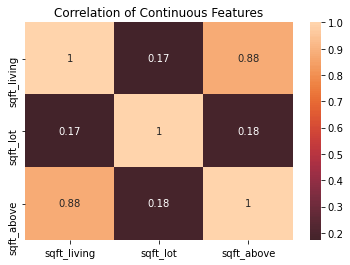

In [430]:
corr = df[cont].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous Features');

#### Interpretation
Multicollinearity is present between __sqft_living__ and __sqft_above__.  I will drop __sqft_above__ before modeling.

In [431]:
# Drop collinear feature
df = df.drop('sqft_above', axis=1)

## Modeling

### Train Test Split and Model Function

In [432]:
#Name variables
X = df.drop('price', axis=1)
y = df['price']
X.head()

,sqft_living,sqft_lot,bath_1_175,bath_175_25,bath_25_35,bath_35_45,bath_45_8,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1180,5650,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2570,7242,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,770,10000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1680,8080,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [433]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [434]:
#Model function
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

### Baseline Model

Following, I will create a model with all features that will serve as our baseline.

In [435]:
model1 = model(X_train,X_test,y_train,y_test);

Train R2:  0.8392611521235334
Test R2:  0.8287892847024411
Train RMSE:  149280.425856272
Test RMSE:  143480.42827559562


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     800.1
Date:                Sat, 01 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:18:09   Log-Likelihood:            -2.3033e+05
No. Observations:               17276   AIC:                         4.609e+05
Df Residuals:                   17163   BIC:                         4.618e+05
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.566e+04   1.54e+05      0.297      0.766   -2.55e+05    3.47e+05
sqft_living      160.5456      2.792     57.499      0.000     155.073     166.019
sqft_lot           0.1531      0.031      5.001      0.000       0.093       0.213
bath_1_175     -1.283e+04   4250.774     -3.019      0.003   -2.12e+04   -4500.466
bath_175_25    -1.011e+04   4572.150     -2.211      0.027   -1.91e+04   -1145.104
bath_25_35       995.3050   5840.388      0.170      0.865   -1.05e+04    1.24e+04
bath_35_45      8.855e+04   1.04e+04      8.541      0.000    6.82e+04    1.09e+05
bath_45_8       3.201e+05   2.09e+04     15.312      0.000    2.79e+05    3.61e+05
bedrooms_2      1.556e+04   1.27e+04      1.229      0.219   -9252.405    4.04e+04
bedrooms_3      2.692e+04   1.27e+04      2.122      0.034    2051.353    5.18e+04
bedrooms_4      1.062e+04    1.3e+04      0.818      0.414   -1.48e+04    3.61e+04
bedrooms_5     -3111.4939   1.37e+04     -0.227      0.820   -2.99e+04    2.37e+04
bedrooms_6     -4.343e+04   1.67e+04     -2.605      0.009   -7.61e+04   -1.08e+04
bedrooms_7     -1.505e+05   3.12e+04     -4.817      0.000   -2.12e+05   -8.93e+04
bedrooms_8     -5.053e+04   4.59e+04     -1.101      0.271    -1.4e+05    3.94e+04
bedrooms_9     -2.606e+05   6.33e+04     -4.117      0.000   -3.85e+05   -1.37e+05
bedrooms_10    -5.078e+05   1.07e+05     -4.725      0.000   -7.18e+05   -2.97e+05
bedrooms_11    -7.278e+04   1.51e+05     -0.483      0.629   -3.68e+05    2.23e+05
floors_15      -4398.6171   4487.959     -0.980      0.327   -1.32e+04    4398.241
floors_20      -1.647e+04   3569.370     -4.615      0.000   -2.35e+04   -9477.188
floors_25        6.39e+04   1.36e+04      4.682      0.000    3.71e+04    9.06e+04
floors_30      -7.483e+04   8112.982     -9.224      0.000   -9.07e+04   -5.89e+04
floors_35       2.617e+04    6.2e+04      0.422      0.673   -9.53e+04    1.48e+05
waterfront_1    6.455e+05   1.73e+04     37.385      0.000    6.12e+05    6.79e+05
view_1           6.99e+04   5819.654     12.011      0.000    5.85e+04    8.13e+04
view_2          1.554e+05   7934.977     19.590      0.000     1.4e+05    1.71e+05
view_3          8.673e+04   9713.653      8.928      0.000    6.77e+04    1.06e+05
view_4          2.589e+05   1.17e+04     22.151      0.000    2.36e+05    2.82e+05
condition_1     6.257e+04    3.3e+04      1.895      0.058   -2144.229    1.27e+05
condition_2     7.264e+04   3.04e+04      2.390      0.017    1.31e+04    1.32e+05
condition_3     1.001e+05   3.04e+04      3.289      0.001    4.04e+04     1.6e+05
condition_4     1.457e+05   3.06e+04      4.757      0.000    8.57e+04    2.06e+05
grade_4        -1.298e+05   1.54e+05     -0.845      0.398   -4.31e+05    1.71e+05
grade_5         -1.83e+05   1.51e+05     -1.212      0.226   -4.79e+05    1.13e+05
grade_6     

Our first model has an R-squared value of .839. There are several features with p_values that are insignificant, but before we drop these features from the data, let's check our residuals.  Our baseline RMSE are as follow:  
__Train RMSE__:  149,280.42
__Test RMSE__:  143,480.43

#### Assumptions Check

In [436]:
# Function for qq_plots
def qq_plot(model):
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

    ax0.hist(model.resid)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

    sm.qqplot(model.resid, stats.t, fit=True, line="45", ax=ax1)
    ax1.set(title='QQ Plot')

    fig.suptitle('Normality of Residuals')

    fig.show()
    return qq_plot

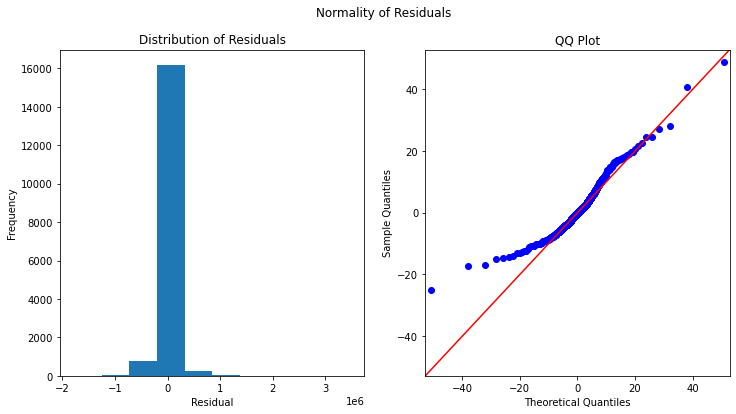

In [437]:
qq_plot(model1);

Our residuals are not normal, which violates the assumption of normality. I will try to remove outliers in our next iteration.

In [438]:
# Residual plot function
def residual_plot(X_train,X_test,y_train,y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Residual Plots')

    axes[0].scatter(y_train, y_train-y_hat_train)
    axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
    axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
    axes[0].hlines(0, xmin=5, xmax=8000000, colors='red')

    axes[1].scatter(y_train, y_hat_train)
    axes[1].scatter(y_test, y_hat_test, color='orange')
    axes[1].plot([10, 8000000], [10, 5300000], color='red', linestyle='-')
    axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
    fig.show()
    
    return residual_plot
    

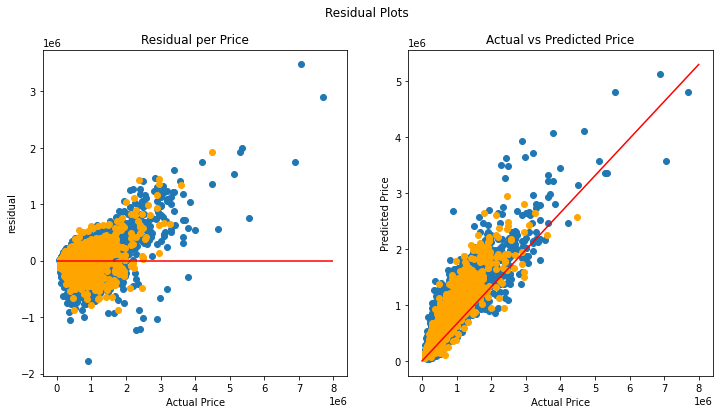

In [439]:
residual_plot(X_train,X_test,y_train,y_test);

Our results are not homoscedastic.  We have inconsistent model performance mostly underpredicting as the sale price gets higher.

### Model A - Remove Outliers from Price

In [440]:
# Function to remove outliers
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [441]:
def model_outlier(X_train, X_test, y_train, y_test):
   
    # remove outliers 
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
   # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # display summary and return the model
    display(model.summary())
    return model

In [442]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2, random_state=123)
model2 = model_outlier(X_train2,X_test2,y_train2,y_test2);

Train R2:  0.8335062975810769
Test R2:  0.8281258122852568
Train RMSE:  84598.66029571461
Test RMSE:  86545.59797296602


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     731.9
Date:                Sat, 01 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:18:11   Log-Likelihood:            -2.0856e+05
No. Observations:               16339   AIC:                         4.173e+05
Df Residuals:                   16227   BIC:                         4.182e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        9.33e+04   8.71e+04      1.071      0.284   -7.74e+04    2.64e+05
sqft_living      111.2683      1.750     63.570      0.000     107.838     114.699
sqft_lot           0.2879      0.018     15.972      0.000       0.253       0.323
bath_1_175       467.6480   2423.752      0.193      0.847   -4283.173    5218.469
bath_175_25     5126.3910   2626.555      1.952      0.051     -21.947    1.03e+04
bath_25_35      1.923e+04   3409.295      5.642      0.000    1.26e+04    2.59e+04
bath_35_45      2.071e+04   7289.180      2.841      0.005    6421.691     3.5e+04
bath_45_8      -7.218e+04   1.98e+04     -3.654      0.000   -1.11e+05   -3.35e+04
bedrooms_2      1.386e+04   7178.935      1.930      0.054    -213.006    2.79e+04
bedrooms_3      2.446e+04   7201.077      3.397      0.001    1.03e+04    3.86e+04
bedrooms_4      2.348e+04   7383.625      3.180      0.001    9004.416    3.79e+04
bedrooms_5      7494.1664   7854.902      0.954      0.340   -7902.306    2.29e+04
bedrooms_6     -1.055e+04   9833.438     -1.073      0.283   -2.98e+04    8724.260
bedrooms_7     -6.609e+04   1.96e+04     -3.368      0.001   -1.05e+05   -2.76e+04
bedrooms_8     -5.905e+04   3.12e+04     -1.891      0.059    -1.2e+05    2154.399
bedrooms_9     -6.381e+04   4.37e+04     -1.460      0.144   -1.49e+05    2.18e+04
bedrooms_10    -8.175e+04   8.56e+04     -0.955      0.339   -2.49e+05     8.6e+04
bedrooms_11     1.163e+04   8.55e+04      0.136      0.892   -1.56e+05    1.79e+05
floors_15       9987.4324   2610.180      3.826      0.000    4871.192    1.51e+04
floors_20      -9830.2769   2098.820     -4.684      0.000   -1.39e+04   -5716.358
floors_25      -3.178e+04   9170.703     -3.466      0.001   -4.98e+04   -1.38e+04
floors_30      -6.928e+04   4785.660    -14.477      0.000   -7.87e+04   -5.99e+04
floors_35      -7.897e+04   3.82e+04     -2.068      0.039   -1.54e+05   -4124.107
waterfront_1    1.437e+05   1.53e+04      9.378      0.000    1.14e+05    1.74e+05
view_1          6.261e+04   3575.544     17.510      0.000    5.56e+04    6.96e+04
view_2          9.096e+04   5358.572     16.975      0.000    8.05e+04    1.01e+05
view_3          6.434e+04   6075.573     10.591      0.000    5.24e+04    7.63e+04
view_4          1.544e+05   8630.553     17.886      0.000    1.37e+05    1.71e+05
condition_1     4.038e+04   1.91e+04      2.120      0.034    3037.374    7.77e+04
condition_2     6.502e+04   1.76e+04      3.695      0.000    3.05e+04    9.95e+04
condition_3      8.64e+04   1.76e+04      4.905      0.000    5.19e+04    1.21e+05
condition_4     1.166e+05   1.77e+04      6.573      0.000    8.18e+04    1.51e+05
grade_4        -1.382e+05   8.71e+04     -1.586      0.113   -3.09e+05    3.26e+04
grade_5        -1.693e+05   8.56e+04     -1.978      0.048   -3.37e+05   -1501.816
grade_6     

#### Assumptions Check

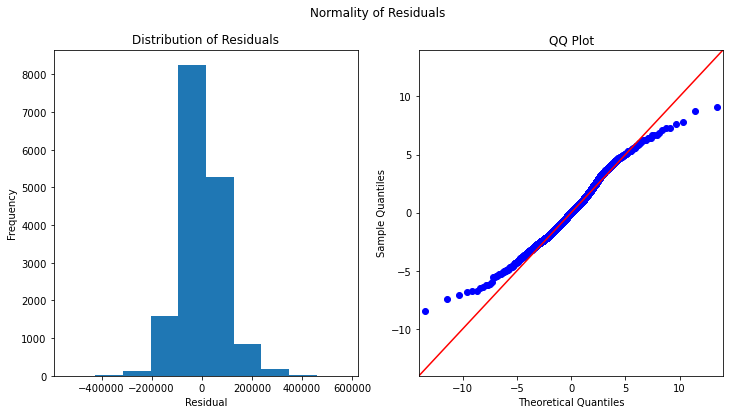

In [443]:
qq_plot(model2);

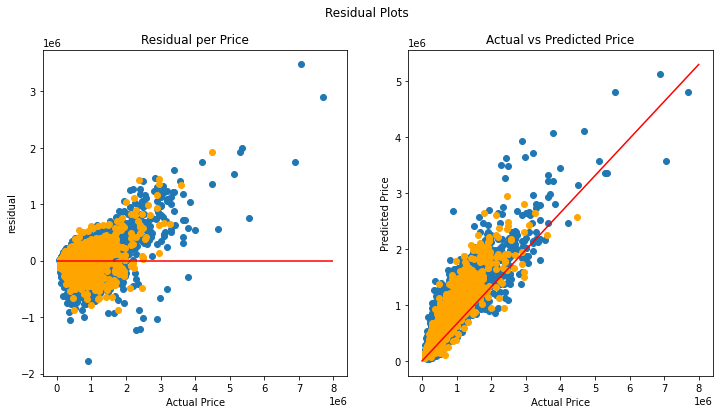

In [444]:
residual_plot(X_train2,X_test2,y_train2,y_test2);

#### Interpretation

* Baseline R2 was 0.839, we have dropped to 0.834 for this iteration.
* Train RMSE: 84,598.66; Test RMSE: 86,545.60.  This is a big improvement from the RMSE of 149,000 in our baseline model.
* Difference between train and test RMSE is acceptable at ~2,000.
* Distibution of residuals have improved, but they still fail normality assumptions.
* Fail homoscedasticity check, higher prices are underpredicted.

### Model B - Remove Outliers from Predictors

In [445]:
sqft_lot_outliers = remove_outliers(df['sqft_lot'])

In [446]:
df = df.drop(sqft_lot_outliers)

In [447]:
sqft_living_outliers = remove_outliers(df['sqft_living'])

In [448]:
df = df.drop(sqft_living_outliers)

In [449]:
#Name variables
X_out = df.drop('price', axis=1)
y_out = df['price']
X.head()

,sqft_living,sqft_lot,bath_1_175,bath_175_25,bath_25_35,bath_35_45,bath_45_8,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1180,5650,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2570,7242,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,770,10000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1680,8080,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [450]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_out,y_out,test_size=0.2, random_state=123)
model3 = model_outlier(X_train3,X_test3,y_train3,y_test3);

Train R2:  0.8393027217151785
Test R2:  0.8328208496463197
Train RMSE:  78142.32349698021
Test RMSE:  79202.6317694398


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     680.0
Date:                Sat, 01 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:18:12   Log-Likelihood:            -1.8307e+05
No. Observations:               14432   AIC:                         3.664e+05
Df Residuals:                   14321   BIC:                         3.672e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.476e+04   8.21e+04      0.424      0.672   -1.26e+05    1.96e+05
sqft_living      114.9888      1.893     60.735      0.000     111.278     118.700
sqft_lot           1.8035      0.264      6.840      0.000       1.287       2.320
bath_1_175     -2663.3268   2339.574     -1.138      0.255   -7249.195    1922.541
bath_175_25      647.2931   2560.993      0.253      0.800   -4372.585    5667.171
bath_25_35      1.244e+04   3386.332      3.674      0.000    5803.856    1.91e+04
bath_35_45      3213.8641   8619.445      0.373      0.709   -1.37e+04    2.01e+04
bath_45_8      -1490.3187   3.09e+04     -0.048      0.962    -6.2e+04    5.91e+04
bedrooms_2      1.335e+04   7117.972      1.875      0.061    -603.273    2.73e+04
bedrooms_3      2.148e+04   7147.850      3.006      0.003    7473.814    3.55e+04
bedrooms_4      1.958e+04   7342.446      2.667      0.008    5191.360     3.4e+04
bedrooms_5      4049.3776   7835.457      0.517      0.605   -1.13e+04    1.94e+04
bedrooms_6     -1.936e+04   9934.795     -1.949      0.051   -3.88e+04     109.047
bedrooms_7     -4.257e+04   2.26e+04     -1.882      0.060   -8.69e+04    1758.535
bedrooms_8     -9.166e+04   4.08e+04     -2.248      0.025   -1.72e+05   -1.17e+04
bedrooms_9      3.822e+04   5.64e+04      0.678      0.498   -7.23e+04    1.49e+05
bedrooms_10    -7.824e+04   5.62e+04     -1.392      0.164   -1.88e+05     3.2e+04
bedrooms_11       36.8846   7.91e+04      0.000      1.000   -1.55e+05    1.55e+05
floors_15       1.457e+04   2613.410      5.575      0.000    9445.919    1.97e+04
floors_20      -4996.4698   2209.904     -2.261      0.024   -9328.169    -664.771
floors_25      -1.003e+04   9571.886     -1.048      0.295   -2.88e+04    8732.588
floors_30      -6.056e+04   4785.809    -12.654      0.000   -6.99e+04   -5.12e+04
floors_35      -9.371e+04   3.94e+04     -2.377      0.017   -1.71e+05   -1.64e+04
waterfront_1    1.886e+05   1.92e+04      9.813      0.000    1.51e+05    2.26e+05
view_1           6.69e+04   3705.848     18.053      0.000    5.96e+04    7.42e+04
view_2          8.142e+04   5783.562     14.077      0.000    7.01e+04    9.28e+04
view_3          5.635e+04   5981.466      9.421      0.000    4.46e+04    6.81e+04
view_4          1.723e+05   1.03e+04     16.693      0.000    1.52e+05    1.93e+05
condition_1     6.481e+04   2.32e+04      2.791      0.005    1.93e+04     1.1e+05
condition_2     9.375e+04   2.21e+04      4.250      0.000    5.05e+04    1.37e+05
condition_3     1.139e+05   2.21e+04      5.160      0.000    7.06e+04    1.57e+05
condition_4     1.453e+05   2.22e+04      6.556      0.000    1.02e+05    1.89e+05
grade_4        -1.243e+05   8.17e+04     -1.522      0.128   -2.84e+05    3.58e+04
grade_5        -1.622e+05   7.93e+04     -2.046      0.041   -3.18e+05   -6816.024
grade_6     

#### Assumptions Check

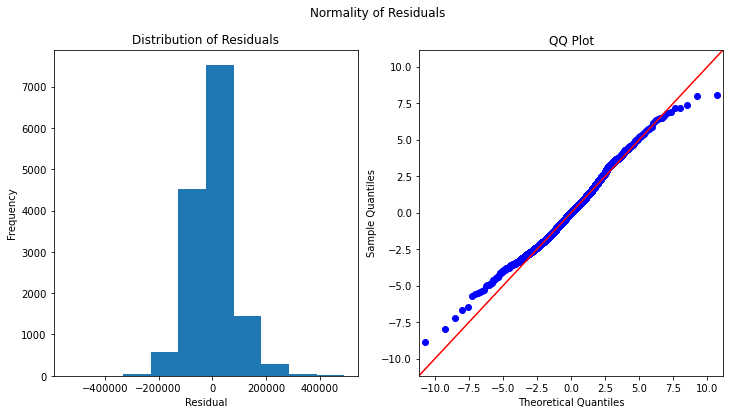

In [451]:
qq_plot(model3);

In [452]:
# Residual plot function
def residual_plot_scale(X_train,X_test,y_train,y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Residual Plots')

    axes[0].scatter(y_train, y_train-y_hat_train)
    axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
    axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
    axes[0].hlines(0, xmin=5, xmax=3200000, colors='red')

    axes[1].scatter(y_train, y_hat_train)
    axes[1].scatter(y_test, y_hat_test, color='orange')
    axes[1].plot([10, 3200000], [10, 2500000], color='red', linestyle='-')
    axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
    fig.show()
    
    return residual_plot
    

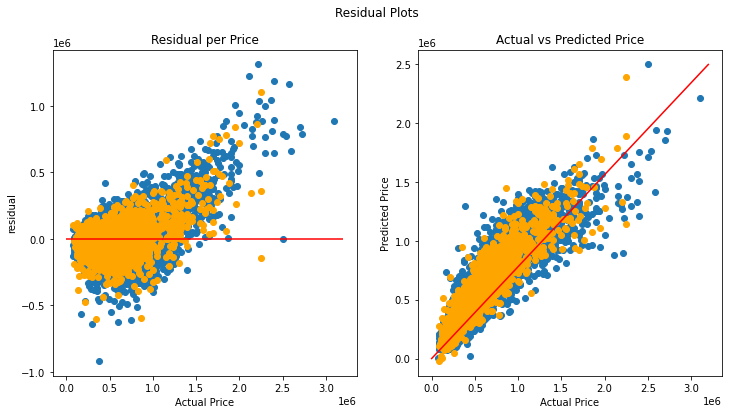

In [453]:
residual_plot_scale(X_train3,X_test3,y_train3,y_test3);

#### Interpretation

* R2 was 0.834, we improved to 0.839 for this iteration.
* Train RMSE: 78,142.32; Test RMSE: 79,202.63.  Another improvement on lowering our RMSE from ~84,000.
* Difference between train and test RMSE is acceptable at ~1,000.  Model is not overfittted.
* Distibution of residuals is close to normal, still have some light tails.
* Fail homoscedasticity check, higher prices are underpredicted.

### Model C - Remove Insignificant Features

In [454]:
high_p = ['bath_1_175','bath_35_45','bath_45_8','bedrooms_2','bedrooms_5','bedrooms_6','bedrooms_9','bedrooms_10','bedrooms_11',
          'floors_15','floors_20','floors_25','floors_35','condition_1','grade_4','grade_7','grade_8','grade_9','grade_10',
          'grade_11','grade_12','grade_13','zipcode_98002','zipcode_98003','zipcode_98022','zipcode_98023','zipcode_98030',
          'zipcode_98032','zipcode_98092']

In [455]:
#Create new dataframe with significant p-values
sig_X = X_out.drop(high_p, axis=1)

In [456]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(sig_X,y_out,test_size=0.2, random_state=123)
model4 = model_outlier(X_train4,X_test4,y_train4,y_test4);

Train R2:  0.8158585873675179
Test R2:  0.8087657296243353
Train RMSE:  83648.4301959285
Test RMSE:  84709.36329505061


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     765.9
Date:                Sat, 01 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:18:14   Log-Likelihood:            -1.8406e+05
No. Observations:               14432   AIC:                         3.683e+05
Df Residuals:                   14348   BIC:                         3.689e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7.644e+04   8648.544     -8.838      0.000   -9.34e+04   -5.95e+04
sqft_living      146.1606      1.534     95.265      0.000     143.153     149.168
sqft_lot           2.0420      0.264      7.723      0.000       1.524       2.560
bath_175_25     5129.9708   1835.633      2.795      0.005    1531.893    8728.049
bath_25_35      2.175e+04   2789.515      7.797      0.000    1.63e+04    2.72e+04
bedrooms_3      1.493e+04   1901.648      7.852      0.000    1.12e+04    1.87e+04
bedrooms_4      1.277e+04   2173.916      5.875      0.000    8509.643     1.7e+04
bedrooms_7     -6.822e+04   2.26e+04     -3.018      0.003   -1.13e+05   -2.39e+04
bedrooms_8     -1.417e+05   4.21e+04     -3.366      0.001   -2.24e+05   -5.92e+04
floors_30      -4.281e+04   4618.871     -9.268      0.000   -5.19e+04   -3.38e+04
waterfront_1    1.749e+05   2.05e+04      8.520      0.000    1.35e+05    2.15e+05
view_1           7.87e+04   3944.824     19.949      0.000     7.1e+04    8.64e+04
view_2          9.562e+04   6159.402     15.524      0.000    8.35e+04    1.08e+05
view_3          6.084e+04   6385.735      9.527      0.000    4.83e+04    7.34e+04
view_4          1.972e+05    1.1e+04     17.926      0.000    1.76e+05    2.19e+05
condition_2      4.46e+04   7707.312      5.787      0.000    2.95e+04    5.97e+04
condition_3      5.67e+04   7758.824      7.308      0.000    4.15e+04    7.19e+04
condition_4     8.591e+04   8037.820     10.688      0.000    7.02e+04    1.02e+05
grade_5        -2.469e+04   7006.607     -3.524      0.000   -3.84e+04    -1.1e+04
grade_6        -1.739e+04   2626.343     -6.622      0.000   -2.25e+04   -1.22e+04
zipcode_98004   5.447e+05   8484.027     64.198      0.000    5.28e+05    5.61e+05
zipcode_98005    3.58e+05   9082.242     39.414      0.000     3.4e+05    3.76e+05
zipcode_98006   3.165e+05   5557.775     56.943      0.000    3.06e+05    3.27e+05
zipcode_98007   2.861e+05   8714.524     32.834      0.000    2.69e+05    3.03e+05
zipcode_98008   2.528e+05   6202.126     40.754      0.000    2.41e+05    2.65e+05
zipcode_98010   9.455e+04    1.5e+04      6.292      0.000    6.51e+04    1.24e+05
zipcode_98011   1.584e+05   7192.484     22.026      0.000    1.44e+05    1.73e+05
zipcode_98014    9.53e+04   1.33e+04      7.153      0.000    6.92e+04    1.21e+05
zipcode_98019   9.849e+04   8378.088     11.756      0.000    8.21e+04    1.15e+05
zipcode_98024    1.36e+05   1.73e+04      7.866      0.000    1.02e+05     1.7e+05
zipcode_98027   2.659e+05   6323.424     42.049      0.000    2.54e+05    2.78e+05
zipcode_98028   1.493e+05   6427.284     23.226      0.000    1.37e+05    1.62e+05
zipcode_98029   2.634e+05   5938.059     44.359      0.000    2.52e+05    2.75e+05
zipcode_98031   1.874e+04   6265.652      2.991      0.003    6457.859     3.1e+04
zipcode_9803

#### Assumptions Check

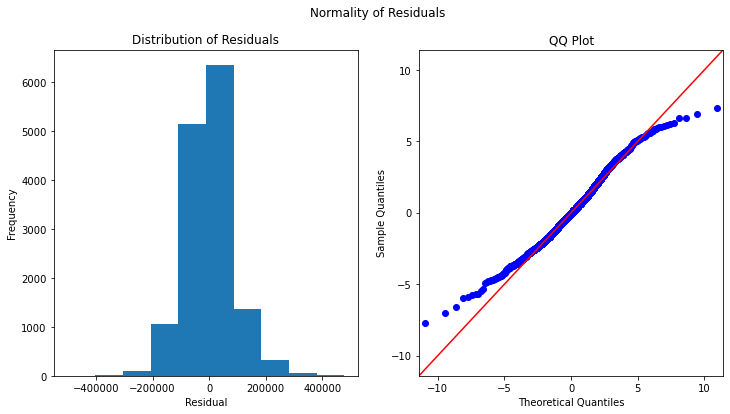

In [457]:
qq_plot(model4);

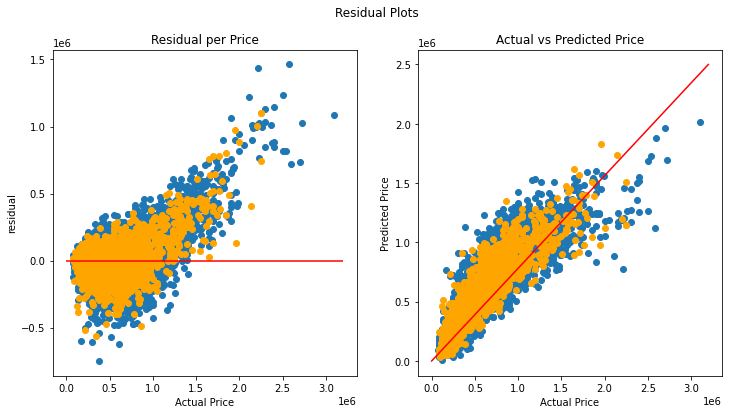

In [458]:
residual_plot_scale(X_train4,X_test4,y_train4,y_test4);

#### Interpretation

* R2 was 0.839, we are lower for this iteration at 0.816.
* Train RMSE: 83,648.43; Test RMSE: 84,709.36. Higher RMSE from ~78,000.
* Difference between train and test RMSE is acceptable at ~1,000.  Model is not overfittted.
* Distibution of residuals is close to normal, still have some light tails.
* Fail homoscedasticity check, higher prices are still underpredicted.

### Model D -  Log Transformation

For this iteration, I will log transform price.


In [459]:
log_y = np.log(y_out)

In [460]:
# Model function to reverse log transform for metrics
def model_log(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model


In [461]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(sig_X,log_y,test_size=0.2,random_state=123)
model5 = model_log(X_train5,X_test5,y_train5,y_test5);

Train R2:  0.8517699542031145
Test R2:  0.851563191738585
Train RMSE:  108603.30404231948
Test RMSE:  110030.43959523915


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1032.
Date:                Sat, 01 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:18:15   Log-Likelihood:                 4030.4
No. Observations:               14989   AIC:                            -7893.
Df Residuals:                   14905   BIC:                            -7253.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.6535      0.019    615.562      0.000      11.616      11.691
sqft_living        0.0003    3.2e-06     99.189      0.000       0.000       0.000
sqft_lot        5.232e-06   5.71e-07      9.159      0.000    4.11e-06    6.35e-06
bath_175_25        0.0345      0.004      8.693      0.000       0.027       0.042
bath_25_35         0.0466      0.006      7.891      0.000       0.035       0.058
bedrooms_3         0.0330      0.004      7.995      0.000       0.025       0.041
bedrooms_4         0.0304      0.005      6.533      0.000       0.021       0.040
bedrooms_7        -0.1998      0.048     -4.142      0.000      -0.294      -0.105
bedrooms_8        -0.3143      0.093     -3.380      0.001      -0.497      -0.132
floors_30         -0.0779      0.010     -7.908      0.000      -0.097      -0.059
waterfront_1       0.4981      0.031     16.275      0.000       0.438       0.558
view_1             0.1551      0.008     18.832      0.000       0.139       0.171
view_2             0.2347      0.012     19.859      0.000       0.212       0.258
view_3             0.1185      0.013      9.032      0.000       0.093       0.144
view_4             0.3756      0.018     20.528      0.000       0.340       0.411
condition_2        0.1511      0.017      8.910      0.000       0.118       0.184
condition_3        0.1793      0.017     10.502      0.000       0.146       0.213
condition_4        0.2311      0.018     13.098      0.000       0.197       0.266
grade_5           -0.2236      0.015    -14.465      0.000      -0.254      -0.193
grade_6           -0.0974      0.006    -16.856      0.000      -0.109      -0.086
zipcode_98004      1.1806      0.015     79.286      0.000       1.151       1.210
zipcode_98005      0.8029      0.020     40.807      0.000       0.764       0.842
zipcode_98006      0.7107      0.012     60.016      0.000       0.687       0.734
zipcode_98007      0.7054      0.019     36.972      0.000       0.668       0.743
zipcode_98008      0.6605      0.014     48.677      0.000       0.634       0.687
zipcode_98010      0.2525      0.033      7.602      0.000       0.187       0.318
zipcode_98011      0.4624      0.016     29.096      0.000       0.431       0.494
zipcode_98014      0.2423      0.029      8.230      0.000       0.185       0.300
zipcode_98019      0.3253      0.019     17.572      0.000       0.289       0.362
zipcode_98024      0.3966      0.038     10.376      0.000       0.322       0.472
zipcode_98027      0.6558      0.014     47.142      0.000       0.628       0.683
zipcode_98028      0.4366      0.014     30.735      0.000       0.409       0.464
zipcode_98029      0.6606      0.013     50.626      0.000       0.635       0.686
zipcode_98031      0.0766      0.014      5.528      0.000       0.049       0.104
zipcode_9803

#### Assumptions Check

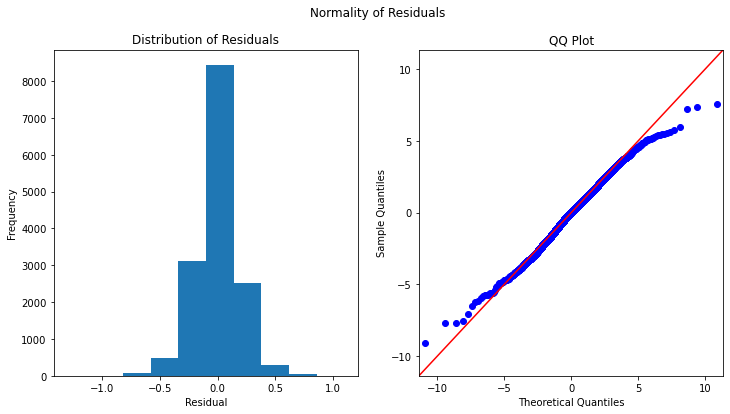

In [462]:
qq_plot(model5);

In [463]:
# Residual plot function
def residual_plot_log(X_train,X_test,y_train,y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Residual Plots')

    axes[0].scatter(y_train, y_train-y_hat_train)
    axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
    axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
    axes[0].hlines(0, xmin=11, xmax=15, colors='red')

    axes[1].scatter(y_train, y_hat_train)
    axes[1].scatter(y_test, y_hat_test, color='orange')
    axes[1].plot([11.5, 15], [11.5, 15], color='red', linestyle='-')
    axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
    fig.show()
    
    return residual_plot_log
    

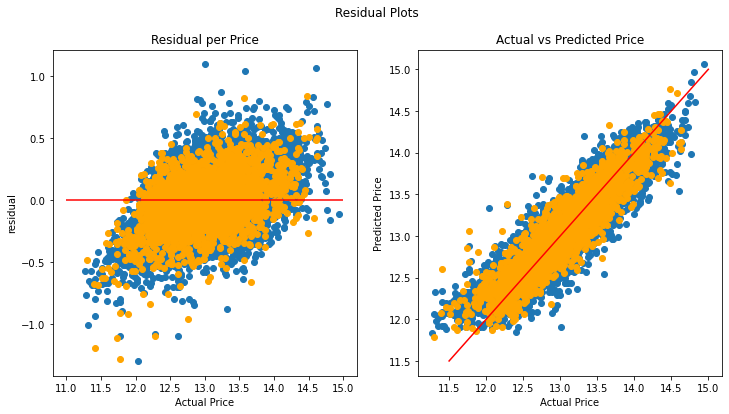

In [464]:
residual_plot_log(X_train5,X_test5,y_train5,y_test5);

In [477]:
((np.e**(model5.params.sort_values(ascending=False))-1)*100).head(50)

Intercept        1.150922e+07
zipcode_98039    2.811981e+02
zipcode_98004    2.256487e+02
zipcode_98112    2.031788e+02
zipcode_98109    1.917444e+02
zipcode_98119    1.871936e+02
zipcode_98102    1.864515e+02
zipcode_98105    1.712228e+02
zipcode_98040    1.610332e+02
zipcode_98199    1.524730e+02
zipcode_98107    1.424884e+02
zipcode_98122    1.376005e+02
zipcode_98103    1.371181e+02
zipcode_98117    1.334841e+02
zipcode_98115    1.317239e+02
zipcode_98005    1.232080e+02
zipcode_98033    1.229324e+02
zipcode_98116    1.166859e+02
zipcode_98006    1.035375e+02
zipcode_98136    1.032746e+02
zipcode_98007    1.024737e+02
zipcode_98052    9.937973e+01
zipcode_98144    9.863421e+01
zipcode_98053    9.424812e+01
zipcode_98029    9.359418e+01
zipcode_98008    9.357666e+01
zipcode_98027    9.266155e+01
zipcode_98075    8.825889e+01
zipcode_98074    8.639567e+01
zipcode_98177    8.510381e+01
zipcode_98125    7.779627e+01
zipcode_98126    7.575651e+01
zipcode_98034    6.998969e+01
zipcode_98

In [472]:
((np.e**(model5.params.sort_values(ascending=False))-1)*100).tail(10)

bedrooms_3         3.351871
bedrooms_4         3.091305
sqft_living        0.031738
sqft_lot           0.000523
has_basement_1    -6.110547
floors_30         -7.496362
grade_6           -9.279271
bedrooms_7       -18.111724
grade_5          -20.033868
bedrooms_8       -26.972117
dtype: float64

In [474]:
# Waterfront Coefficient
(np.exp(.4981)-1)*100

64.55916743438233

In [480]:
# sqft_living coefficient
(np.exp(0.0003)-1)*100

0.030004500450031557

In [490]:
# basement coefficient
(np.exp(-0.0631)-1)*100

-6.115041596367476

In [491]:
#view_4 coefficient
(np.exp(0.3756)-1)*100

45.58646714178145

In [492]:
# Renovated in the last 30 years coefficient
(np.exp(0.0807)-1)*100

8.404563408960142

In [495]:
# 3 floors coefficient
(np.exp(-0.0779)-1)*100

-7.494307238883002

#### Interpretation

* R2 was 0.816, we have improved in this model to 0.852.
* Train RMSE: 108,603.30; Test RMSE: 110,030.43. Higher RMSE from ~84,000.
* Difference between train and test RMSE is acceptable at ~2,000.  Model is not overfittted.
* Distibution of residuals is close to normal, still have some light tails indicating that errors are likely for extreme values.
* Homoscedasticity has greatly improved! Homes on the lower end now are more overpredicted, but due to the fact that we want a wide range of prices in our model it is acceptable.
* Even though our RMSE has increased, this is our best performing model because it passes the assumptions of regression.


### Scale the Final Model

To determine which features have the most impact on sale price, I will update my model fuction to scale the data using Standard Scaler.  This will allow us to compare the effects of each feature on a level playing field.

In [465]:
# Model function to reverse log transform for metrics
def model_scale_log(X_train, X_test, y_train, y_test):
    
    standardizer = StandardScaler()

    X_train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)
    
    X_train_scaled['price'] = y_train.values
    X_test_scaled['price'] = y_test.values
    
    # statsmodels
    outcome = 'price'
    predictors = X_train_scaled.drop('price', axis=1)
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum
    model = ols(formula=formula, data=X_train_scaled).fit()
    
    # sklearn
    X_train_scaled = X_train_scaled.drop('price', axis=1)
    X_test_scaled = X_test_scaled.drop('price', axis=1)
    
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, y_train)
    
    y_hat_train_log = linreg.predict(X_train_scaled)
    y_hat_test_log = linreg.predict(X_test_scaled)
    
    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train_scaled, y_train))
    print("Test R2: ", linreg.score(X_test_scaled, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [466]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(sig_X,log_y,test_size=0.2,random_state=123)
model6 = model_scale_log(X_train6,X_test6,y_train6,y_test6);

Train R2:  0.8517699542031145
Test R2:  0.8515631917385926
Train RMSE:  108603.30404232668
Test RMSE:  110030.4395952352


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1032.
Date:                Sat, 01 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:18:16   Log-Likelihood:                 4030.4
No. Observations:               14989   AIC:                            -7893.
Df Residuals:                   14905   BIC:                            -7253.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.9911      0.002   8576.825      0.000      12.988      12.994
sqft_living        0.2286      0.002     99.189      0.000       0.224       0.233
sqft_lot           0.0186      0.002      9.159      0.000       0.015       0.023
bath_175_25        0.0171      0.002      8.693      0.000       0.013       0.021
bath_25_35         0.0158      0.002      7.891      0.000       0.012       0.020
bedrooms_3         0.0165      0.002      7.995      0.000       0.012       0.020
bedrooms_4         0.0140      0.002      6.533      0.000       0.010       0.018
bedrooms_7        -0.0063      0.002     -4.142      0.000      -0.009      -0.003
bedrooms_8        -0.0051      0.002     -3.380      0.001      -0.008      -0.002
floors_30         -0.0133      0.002     -7.908      0.000      -0.017      -0.010
waterfront_1       0.0293      0.002     16.275      0.000       0.026       0.033
view_1             0.0295      0.002     18.832      0.000       0.026       0.033
view_2             0.0310      0.002     19.859      0.000       0.028       0.034
view_3             0.0140      0.002      9.032      0.000       0.011       0.017
view_4             0.0373      0.002     20.528      0.000       0.034       0.041
condition_2        0.0721      0.008      8.910      0.000       0.056       0.088
condition_3        0.0788      0.007     10.502      0.000       0.064       0.093
condition_4        0.0630      0.005     13.098      0.000       0.054       0.072
grade_5           -0.0229      0.002    -14.465      0.000      -0.026      -0.020
grade_6           -0.0294      0.002    -16.856      0.000      -0.033      -0.026
zipcode_98004      0.1268      0.002     79.286      0.000       0.124       0.130
zipcode_98005      0.0637      0.002     40.807      0.000       0.061       0.067
zipcode_98006      0.0995      0.002     60.016      0.000       0.096       0.103
zipcode_98007      0.0577      0.002     36.972      0.000       0.055       0.061
zipcode_98008      0.0784      0.002     48.677      0.000       0.075       0.082
zipcode_98010      0.0117      0.002      7.602      0.000       0.009       0.015
zipcode_98011      0.0460      0.002     29.096      0.000       0.043       0.049
zipcode_98014      0.0127      0.002      8.230      0.000       0.010       0.016
zipcode_98019      0.0275      0.002     17.572      0.000       0.024       0.031
zipcode_98024      0.0159      0.002     10.376      0.000       0.013       0.019
zipcode_98027      0.0760      0.002     47.142      0.000       0.073       0.079
zipcode_98028      0.0491      0.002     30.735      0.000       0.046       0.052
zipcode_98029      0.0829      0.002     50.626      0.000       0.080       0.086
zipcode_98031      0.0088      0.002      5.528      0.000       0.006       0.012
zipcode_9803

Features with the most impact on sale price ranked.  The features with the most positive impact on sale price are __sqft_living__ and __zipcode__.

In [487]:
model6.params.sort_values(ascending=False).head(50)

Intercept        12.991108
sqft_living       0.228635
zipcode_98103     0.151857
zipcode_98115     0.144025
zipcode_98117     0.143762
zipcode_98112     0.127577
zipcode_98004     0.126825
zipcode_98199     0.117198
zipcode_98052     0.112953
zipcode_98033     0.112095
zipcode_98122     0.109072
zipcode_98105     0.108682
zipcode_98119     0.103260
zipcode_98107     0.103126
zipcode_98040     0.101895
zipcode_98116     0.099612
zipcode_98006     0.099531
zipcode_98144     0.091277
zipcode_98034     0.086746
zipcode_98074     0.085337
zipcode_98125     0.082926
zipcode_98029     0.082918
zipcode_98109     0.082260
zipcode_98136     0.080587
condition_3       0.078758
zipcode_98008     0.078356
zipcode_98126     0.076753
zipcode_98027     0.075980
zipcode_98118     0.075680
zipcode_98133     0.075043
zipcode_98053     0.074086
zipcode_98102     0.073762
condition_2       0.072096
zipcode_98075     0.071689
zipcode_98177     0.065956
zipcode_98005     0.063720
condition_4       0.062951
z

Features with the most negative impace on sale price include if the house has a basement, grade of 5 or 6, and 3 floors.

In [498]:
model6.params.sort_values(ascending=True).head(10)


has_basement_1   -0.030770
grade_6          -0.029363
grade_5          -0.022904
floors_30        -0.013340
bedrooms_7       -0.006318
bedrooms_8       -0.005134
zipcode_98188     0.005408
zipcode_98198     0.005635
zipcode_98042     0.007553
zipcode_98148     0.007650
dtype: float64

## Conclusions

Multiple linear regression analysis was used to build a model to predict housing prices in King County, WA. After 4 iterations from out baseline model, the results of the final regression model (Model D) indicated that 83 predictors explained 85.2% of the variance in the dataset(R2= 0.852). The RMSE of the final model was $108,603.30, which is the error in our price prediction. All of the independent variables used in the model were significant predictors of sale price with p-values less than 0.05.

Following are features that have the most positive effect on sale price:

* For every 1 square foot of living space, the price is increased by 0.03%.
* Location is 2nd highest indicator of price. Our top 10 zipcodes (98039, 98004, 98112, 98109, 98119, 98102, 98105, 98040, 98199, 98107) were 142 to 281% higher in price than our baseline zipcode of 98001.

Following are features that have the most negative impact on sale price:
* Homes with a basement decreases the price by 6.11%.
* Homes with 3 floors decreases the price by 7.49%.  More floors is less desirable.

Following are some other notable conclusions:

* Price for homes with a waterfront are 64.5% higher than homes without a waterfront.
* Homes that have been renovated in the last 30 years will increase the price by 8.40%.
* Homes with a view rated as 4 (highest rating- i.e. Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, etc) increase the price by 45.59%.

Future work to improve on this model would be to make multiple models in different price ranges (i.e. 100k - 500k, 500k - 1 million, etc). Our model has limitations due to the wide range of prices in the dataset such as an error of $108,000 in predicting the price.  Another interesting extension to the project for future work is adding school districts grade into the model.